# **⭐ Classification Model to Identify Multiple Disease**

In [1]:
# import library
import numpy as np
import pandas as pd

In [2]:
# import data
disease = pd.read_csv('https://github.com/ybifoundation/Dataset/raw/main/MultipleDiseasePrediction.csv')

In [3]:
# view data
disease.head()

,itching,skin_rash,nodal_skin_eruptions,continuous_sneezing,shivering,chills,joint_pain,stomach_pain,acidity,ulcers_on_tongue,...,blackheads,scurring,skin_peeling,silver_like_dusting,small_dents_in_nails,inflammatory_nails,blister,red_sore_around_nose,yellow_crust_ooze,prognosis
0,1,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Fungal infection
1,0,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Fungal infection
2,1,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Fungal infection
3,1,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Fungal infection
4,1,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Fungal infection


In [4]:
# info of data
disease.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4920 entries, 0 to 4919
Columns: 133 entries, itching to prognosis
dtypes: int64(132), object(1)
memory usage: 5.0+ MB


In [6]:
# summary statistics
disease.describe()

,itching,skin_rash,nodal_skin_eruptions,continuous_sneezing,shivering,chills,joint_pain,stomach_pain,acidity,ulcers_on_tongue,...,pus_filled_pimples,blackheads,scurring,skin_peeling,silver_like_dusting,small_dents_in_nails,inflammatory_nails,blister,red_sore_around_nose,yellow_crust_ooze
count,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,...,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000
mean,0.137805,0.159756,0.021951,0.045122,0.021951,0.162195,0.139024,0.045122,0.045122,0.021951,...,0.021951,0.021951,0.021951,0.023171,0.023171,0.023171,0.023171,0.023171,0.023171,0.023171
std,0.344730,0.366417,0.146539,0.207593,0.146539,0.368667,0.346007,0.207593,0.207593,0.146539,...,0.146539,0.146539,0.146539,0.150461,0.150461,0.150461,0.150461,0.150461,0.150461,0.150461
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [10]:
# check for missing value
disease.isnull().sum()

itching                 0
skin_rash               0
nodal_skin_eruptions    0
continuous_sneezing     0
shivering               0
                       ..
inflammatory_nails      0
blister                 0
red_sore_around_nose    0
yellow_crust_ooze       0
prognosis               0
Length: 133, dtype: int64

In [11]:
# check for categories
disease.nunique()

itching                  2
skin_rash                2
nodal_skin_eruptions     2
continuous_sneezing      2
shivering                2
                        ..
inflammatory_nails       2
blister                  2
red_sore_around_nose     2
yellow_crust_ooze        2
prognosis               41
Length: 133, dtype: int64

In [12]:
# correlation
disease.corr()

,itching,skin_rash,nodal_skin_eruptions,continuous_sneezing,shivering,chills,joint_pain,stomach_pain,acidity,ulcers_on_tongue,...,pus_filled_pimples,blackheads,scurring,skin_peeling,silver_like_dusting,small_dents_in_nails,inflammatory_nails,blister,red_sore_around_nose,yellow_crust_ooze
itching,1.000000,0.318158,0.326439,-0.086906,-0.059893,-0.175905,-0.160650,0.202850,-0.086906,-0.059893,...,-0.059893,-0.059893,-0.059893,-0.061573,-0.061573,-0.061573,-0.061573,-0.061573,-0.061573,-0.061573
skin_rash,0.318158,1.000000,0.298143,-0.094786,-0.065324,-0.029324,0.171134,0.161784,-0.094786,-0.065324,...,0.320859,0.320859,0.320859,0.331087,0.331087,0.331087,0.331087,0.331087,0.331087,0.331087
nodal_skin_eruptions,0.326439,0.298143,1.000000,-0.032566,-0.022444,-0.065917,-0.060200,-0.032566,-0.032566,-0.022444,...,-0.022444,-0.022444,-0.022444,-0.023073,-0.023073,-0.023073,-0.023073,-0.023073,-0.023073,-0.023073
continuous_sneezing,-0.086906,-0.094786,-0.032566,1.000000,0.608981,0.446238,-0.087351,-0.047254,-0.047254,-0.032566,...,-0.032566,-0.032566,-0.032566,-0.033480,-0.033480,-0.033480,-0.033480,-0.033480,-0.033480,-0.033480
shivering,-0.059893,-0.065324,-0.022444,0.608981,1.000000,0.295332,-0.060200,-0.032566,-0.032566,-0.022444,...,-0.022444,-0.022444,-0.022444,-0.023073,-0.023073,-0.023073,-0.023073,-0.023073,-0.023073,-0.023073
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
small_dents_in_nails,-0.061573,0.331087,-0.023073,-0.033480,-0.023073,-0.067765,0.359845,-0.033480,-0.033480,-0.023073,...,-0.023073,-0.023073,-0.023073,0.946120,0.946120,1.000000,0.946120,-0.023720,-0.023720,-0.023720
inflammatory_nails,-0.061573,0.331087,-0.023073,-0.033480,-0.023073,-0.067765,0.359845,-0.033480,-0.033480,-0.023073,...,-0.023073,-0.023073,-0.023073,0.946120,0.946120,0.946120,1.000000,-0.023720,-0.023720,-0.023720
blister,-0.061573,0.331087,-0.023073,-0.033480,-0.023073,-0.067765,-0.061889,-0.033480,-0.033480,-0.023073,...,-0.023073,-0.023073,-0.023073,-0.023720,-0.023720,-0.023720,-0.023720,1.000000,0.946120,0.946120
red_sore_around_nose,-0.061573,0.331087,-0.023073,-0.033480,-0.023073,-0.067765,-0.061889,-0.033480,-0.033480,-0.023073,...,-0.023073,-0.023073,-0.023073,-0.023720,-0.023720,-0.023720,-0.023720,0.946120,1.000000,0.946120


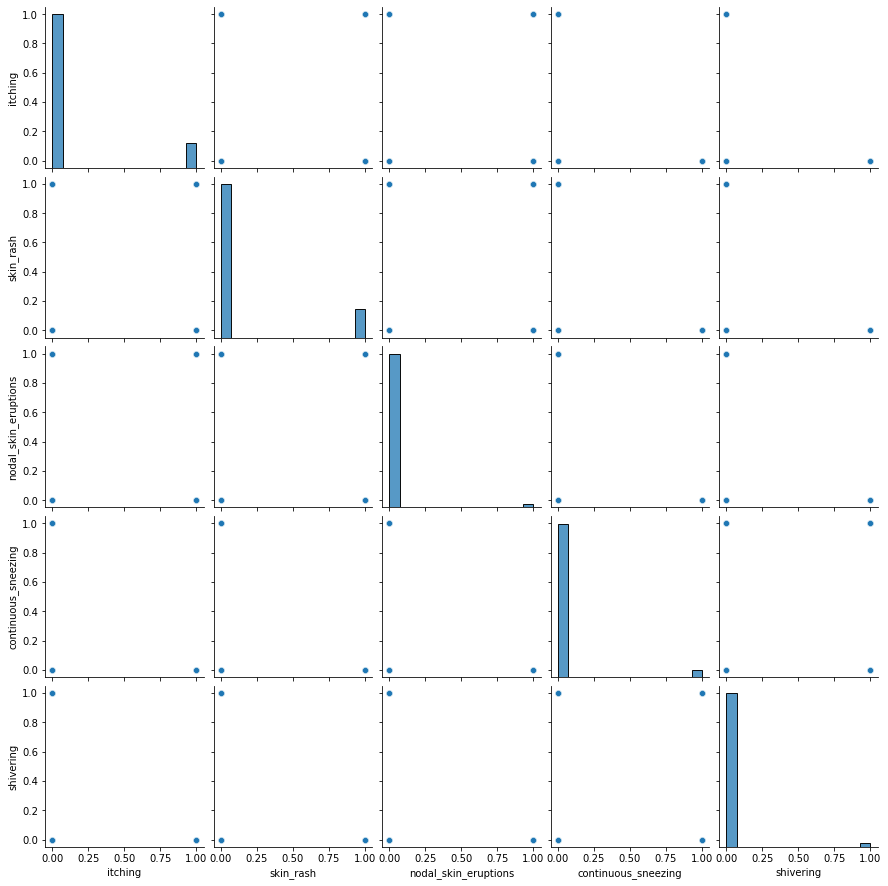

In [13]:
# visualize pairplot
import seaborn as sns
plo = disease.columns[0:5].tolist()
sns.pairplot(disease[plo])

In [14]:
# column names
print(disease.columns.to_list())

['itching', 'skin_rash', 'nodal_skin_eruptions', 'continuous_sneezing', 'shivering', 'chills', 'joint_pain', 'stomach_pain', 'acidity', 'ulcers_on_tongue', 'muscle_wasting', 'vomiting', 'burning_micturition', 'spotting_ urination', 'fatigue', 'weight_gain', 'anxiety', 'cold_hands_and_feets', 'mood_swings', 'weight_loss', 'restlessness', 'lethargy', 'patches_in_throat', 'irregular_sugar_level', 'cough', 'high_fever', 'sunken_eyes', 'breathlessness', 'sweating', 'dehydration', 'indigestion', 'headache', 'yellowish_skin', 'dark_urine', 'nausea', 'loss_of_appetite', 'pain_behind_the_eyes', 'back_pain', 'constipation', 'abdominal_pain', 'diarrhoea', 'mild_fever', 'yellow_urine', 'yellowing_of_eyes', 'acute_liver_failure', 'fluid_overload', 'swelling_of_stomach', 'swelled_lymph_nodes', 'malaise', 'blurred_and_distorted_vision', 'phlegm', 'throat_irritation', 'redness_of_eyes', 'sinus_pressure', 'runny_nose', 'congestion', 'chest_pain', 'weakness_in_limbs', 'fast_heart_rate', 'pain_during_bow

In [15]:
# define y
y = disease["prognosis"]

In [16]:
X = disease[['itching', 'skin_rash', 'nodal_skin_eruptions', 
             'continuous_sneezing', 'shivering', 'chills', 
             'joint_pain', 'stomach_pain', 'acidity', 'ulcers_on_tongue',
             'muscle_wasting', 'vomiting', 'burning_micturition', 'spotting_ urination',
             'fatigue', 'weight_gain', 'anxiety', 'cold_hands_and_feets', 'mood_swings',
             'weight_loss', 'restlessness', 'lethargy', 'patches_in_throat', 'irregular_sugar_level',
             'cough', 'high_fever', 'sunken_eyes', 'breathlessness', 'sweating', 'dehydration',
             'indigestion', 'headache', 'yellowish_skin', 'dark_urine', 'nausea', 'loss_of_appetite',
             'pain_behind_the_eyes', 'back_pain', 'constipation', 'abdominal_pain', 'diarrhoea',
             'mild_fever', 'yellow_urine', 'yellowing_of_eyes', 'acute_liver_failure', 'fluid_overload',
             'swelling_of_stomach', 'swelled_lymph_nodes', 'malaise', 'blurred_and_distorted_vision',
             'phlegm', 'throat_irritation', 'redness_of_eyes', 'sinus_pressure', 'runny_nose', 'congestion',
             'chest_pain', 'weakness_in_limbs', 'fast_heart_rate', 'pain_during_bowel_movements',
             'pain_in_anal_region', 'bloody_stool', 'irritation_in_anus', 'neck_pain', 'dizziness',
             'cramps', 'bruising', 'obesity', 'swollen_legs', 'swollen_blood_vessels',
             'puffy_face_and_eyes', 'enlarged_thyroid', 'brittle_nails', 'swollen_extremeties',
             'excessive_hunger', 'extra_marital_contacts', 'drying_and_tingling_lips', 'slurred_speech',
             'knee_pain', 'hip_joint_pain', 'muscle_weakness', 'stiff_neck', 'swelling_joints',
             'movement_stiffness', 'spinning_movements', 'loss_of_balance', 'unsteadiness',
             'weakness_of_one_body_side', 'loss_of_smell', 'bladder_discomfort', 'foul_smell_of urine',
             'continuous_feel_of_urine', 'passage_of_gases', 'internal_itching', 'toxic_look_(typhos)',
             'depression', 'irritability', 'muscle_pain', 'altered_sensorium', 'red_spots_over_body',
             'belly_pain', 'abnormal_menstruation', 'dischromic _patches', 'watering_from_eyes',
             'increased_appetite', 'polyuria', 'family_history', 'mucoid_sputum', 'rusty_sputum',
             'lack_of_concentration', 'visual_disturbances', 'receiving_blood_transfusion',
             'receiving_unsterile_injections', 'coma', 'stomach_bleeding', 'distention_of_abdomen',
             'history_of_alcohol_consumption', 'fluid_overload.1', 'blood_in_sputum', 'prominent_veins_on_calf',
             'palpitations', 'painful_walking', 'pus_filled_pimples', 'blackheads', 'scurring', 'skin_peeling',
             'silver_like_dusting', 'small_dents_in_nails', 'inflammatory_nails', 'blister',
             'red_sore_around_nose', 'yellow_crust_ooze',]]

In [32]:
# split data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.8)

In [18]:
# verify shape
import numpy as np
a = np.array([X_train.shape, X_test.shape, y_train.shape, y_test.shape], dtype = 'object')
a

array([(3936, 132), (984, 132), (3936,), (984,)], dtype=object)

In [19]:
# select model
from sklearn.ensemble import RandomForestClassifier 
model = RandomForestClassifier()

In [20]:
# train model
model.fit(X_train, y_train)

RandomForestClassifier()

In [31]:
# predict with model
y_pred = model.predict(X_test)
y_pred

array(['Osteoarthristis', 'Cervical spondylosis', 'Fungal infection',
       'Chronic cholestasis', 'Paralysis (brain hemorrhage)', 'GERD',
       'Alcoholic hepatitis', 'Chicken pox', 'Hepatitis D',
       'Hypoglycemia', 'Gastroenteritis', 'Migraine', 'Common Cold',
       'Dimorphic hemmorhoids(piles)', 'Drug Reaction', 'Hepatitis D',
       'hepatitis A', 'Migraine', 'Chronic cholestasis', 'Arthritis',
       'Tuberculosis', 'AIDS', 'Hepatitis C', 'Alcoholic hepatitis',
       'Drug Reaction', '(vertigo) Paroymsal  Positional Vertigo',
       'Drug Reaction', 'Allergy', 'Fungal infection', 'Hepatitis C',
       'Varicose veins', 'Tuberculosis', 'Common Cold',
       'Urinary tract infection', 'Drug Reaction',
       'Paralysis (brain hemorrhage)', 'Pneumonia', 'Hepatitis C',
       'Hypothyroidism', 'Hepatitis D', 'Peptic ulcer diseae',
       'Arthritis', 'Paralysis (brain hemorrhage)', 'Peptic ulcer diseae',
       'AIDS', 'Peptic ulcer diseae', 'Varicose veins', 'Hyperthyroidism

In [ ]:
# model evaluation


In [22]:
# model accuracy
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred)

1.0

In [24]:
# model confusion matrix
from sklearn.metrics import confusion_matrix 
confusion_matrix(y_test, y_pred)

array([[25,  0,  0, ...,  0,  0,  0],
       [ 0, 24,  0, ...,  0,  0,  0],
       [ 0,  0, 23, ...,  0,  0,  0],
       ...,
       [ 0,  0,  0, ..., 24,  0,  0],
       [ 0,  0,  0, ...,  0, 33,  0],
       [ 0,  0,  0, ...,  0,  0, 24]], dtype=int64)

In [30]:
# model classification report
from sklearn.metrics import classification_report  
print(classification_report(y_test, y_pred))

                                         precision    recall  f1-score   support

(vertigo) Paroymsal  Positional Vertigo       1.00      1.00      1.00        25
                                   AIDS       1.00      1.00      1.00        24
                                   Acne       1.00      1.00      1.00        23
                    Alcoholic hepatitis       1.00      1.00      1.00        20
                                Allergy       1.00      1.00      1.00        26
                              Arthritis       1.00      1.00      1.00        31
                       Bronchial Asthma       1.00      1.00      1.00        23
                   Cervical spondylosis       1.00      1.00      1.00        18
                            Chicken pox       1.00      1.00      1.00        30
                    Chronic cholestasis       1.00      1.00      1.00        30
                            Common Cold       1.00      1.00      1.00        33
                           

In [29]:
# future prediction
model.predict([[1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
              1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
              0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
              0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
              0, 0, 0, 0, 0]])

array(['Osteoarthristis'], dtype=object)

In [27]:
# define X_new
X_new = [[1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
              1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
              0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
              0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
              0, 0, 0, 0, 0]]

In [28]:
# predict for X_new
model.predict([[1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
              1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
              0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
              0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
              0, 0, 0, 0, 0]])

array(['Osteoarthristis'], dtype=object)